#  <h1 style='text-align: center;'>DS Assessment</h1>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
books_df = pd.read_csv(r'F:\ThePROIndia\randomwalk-ds-assessment\books.csv')

In [105]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


### Q1: How many rows and columns are there in books.csv dataset?

In [106]:
books_df.shape

(399, 24)

#### The number of rows = *399* and number of columns = *24*

### Q2: How many books do not have an original title?

In [107]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

In [108]:
books_df['original_title'].isnull().sum()

36

#### Number of null values in original_title = *36*

### Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [109]:
books_df.dropna(subset=['original_title'], inplace = True)

In [110]:
books_df['original_title'].isnull().sum()

0

In [111]:
books_df['book_id'].nunique()

363

#### Number of unique values in book_id after removing null values in original_title = *363* 

In [112]:
books_df['original_title'].nunique()

363

### Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [113]:
books_df.average_rating.mean()

3.9870798898071644

#### Average rating of all the books in the dataset based on average_rating = *3.9870798898071644*

### Q5. Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [114]:
books_df.original_publication_year[books_df.original_publication_year == 2000].count()

7

#### Number of books published in the year ‘2000’ based on the ‘original_publication_year’ = *7*

### Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [115]:
books_df.original_title[books_df.work_ratings_count == books_df.work_ratings_count.max()]

0    Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...
Name: original_title, dtype: object

#### Book (title) has the maximum number of ratings based on ‘work_ratings_count’ = *Het Achterhuis: Dagboekbrieven 14 juni 1942*

### Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [116]:
books_df['bins'] = pd.cut(x=books_df['average_rating'], bins=[0, 0.49, 0.99, 1.49, 1.99, 2.49, 2.99, 3.49, 3.99, 4.49, 4.99,5],
                         labels=[0,0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,5])

In [117]:
books_df[['average_rating', 'bins']]

,average_rating,bins
0,4.10,4.0
1,3.51,3.5
2,4.24,4.0
3,3.94,3.5
4,4.30,4.0
...,...,...
394,4.27,4.0
395,3.85,3.5
396,3.70,3.5
397,3.90,3.5


In [120]:
value_count = books_df['bins'].value_counts()
value_count

4.0    186
3.5    170
3.0      7
0.0      0
0.5      0
1.0      0
1.5      0
2.0      0
2.5      0
4.5      0
5.0      0
Name: bins, dtype: int64

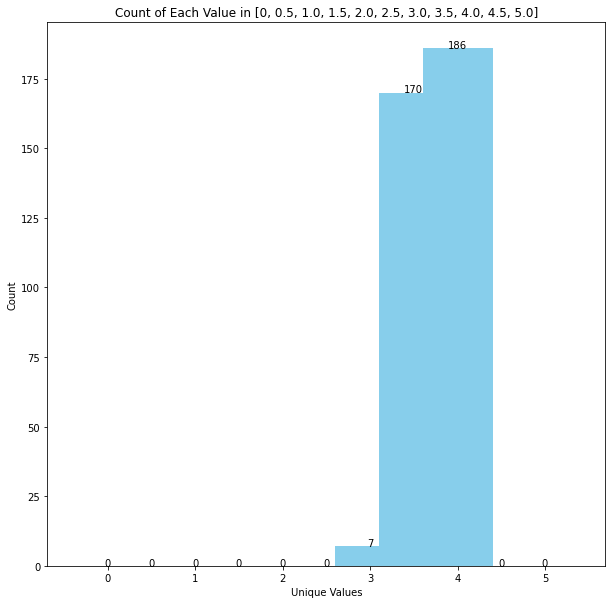

In [134]:
plt.figure(figsize=(10,10))
plt.bar(value_count.index, value_count.values, color='skyblue')

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title(f'Count of Each Value in {bins}')
plt.xticks()

for i, value in enumerate(value_count.values):
    plt.text(value_count.index[i], value + 0.1, str(value), color='black', ha='center')

# Show the plot
plt.show()

#### Bar graph for total number of books in each rating bucketwith values *3.0 = 7, 3.5 = 170, 4.0 = 186* and 0,0.5,1,1.5,2,2.5,4.5,5 = 0